<h1 align="center"> HR Analysis, Prediction and Visualization </b> </h1><br>
<img src=https://blueprintbusinesssolutionscorp.com/wp-content/uploads/2017/12/attrition.png>


# Breakdown of this notebook:
1) **Importing the Libraries**

2) **Loading the dataset**

3) **Understanding the Attrition Problem and the Dataset**

4) **Data Visualization:**   
   - Plot a correlation map for all numeric variables
   - Overtime
   - Marital Status
   - Job Role
   - Gender
   - Education Field
   - Department
   - Buisness Travel
   - Relation between Overtime and Age
   - Total Working Years
   - Education Level
   - Number of Companies Worked
   - Distance from Home

5) **Prediction of Attrition**: LGBM Classifier

## Importing the Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
#print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore")

# Understanding the Attrition Problem and the Dataset

 HR Analytics helps us with interpreting organizational data. It finds out the people-related trends in the data and helps the HR Department take the appropriate steps to keep the organization running smoothly and profitably.Attrition is a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with. 
 
 Interestingly, machine learning models can be deployed to predict potential attrition cases, thereby helping the appropriate HR Personnel take the necessary steps to retain the employee.

## Loading the Dataset

In [4]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

### Print first 10 datapoints

In [5]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


### Getting information about the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

### Describe the dataset

In [7]:
data.describe() # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Plot a correlation map for all numeric variables

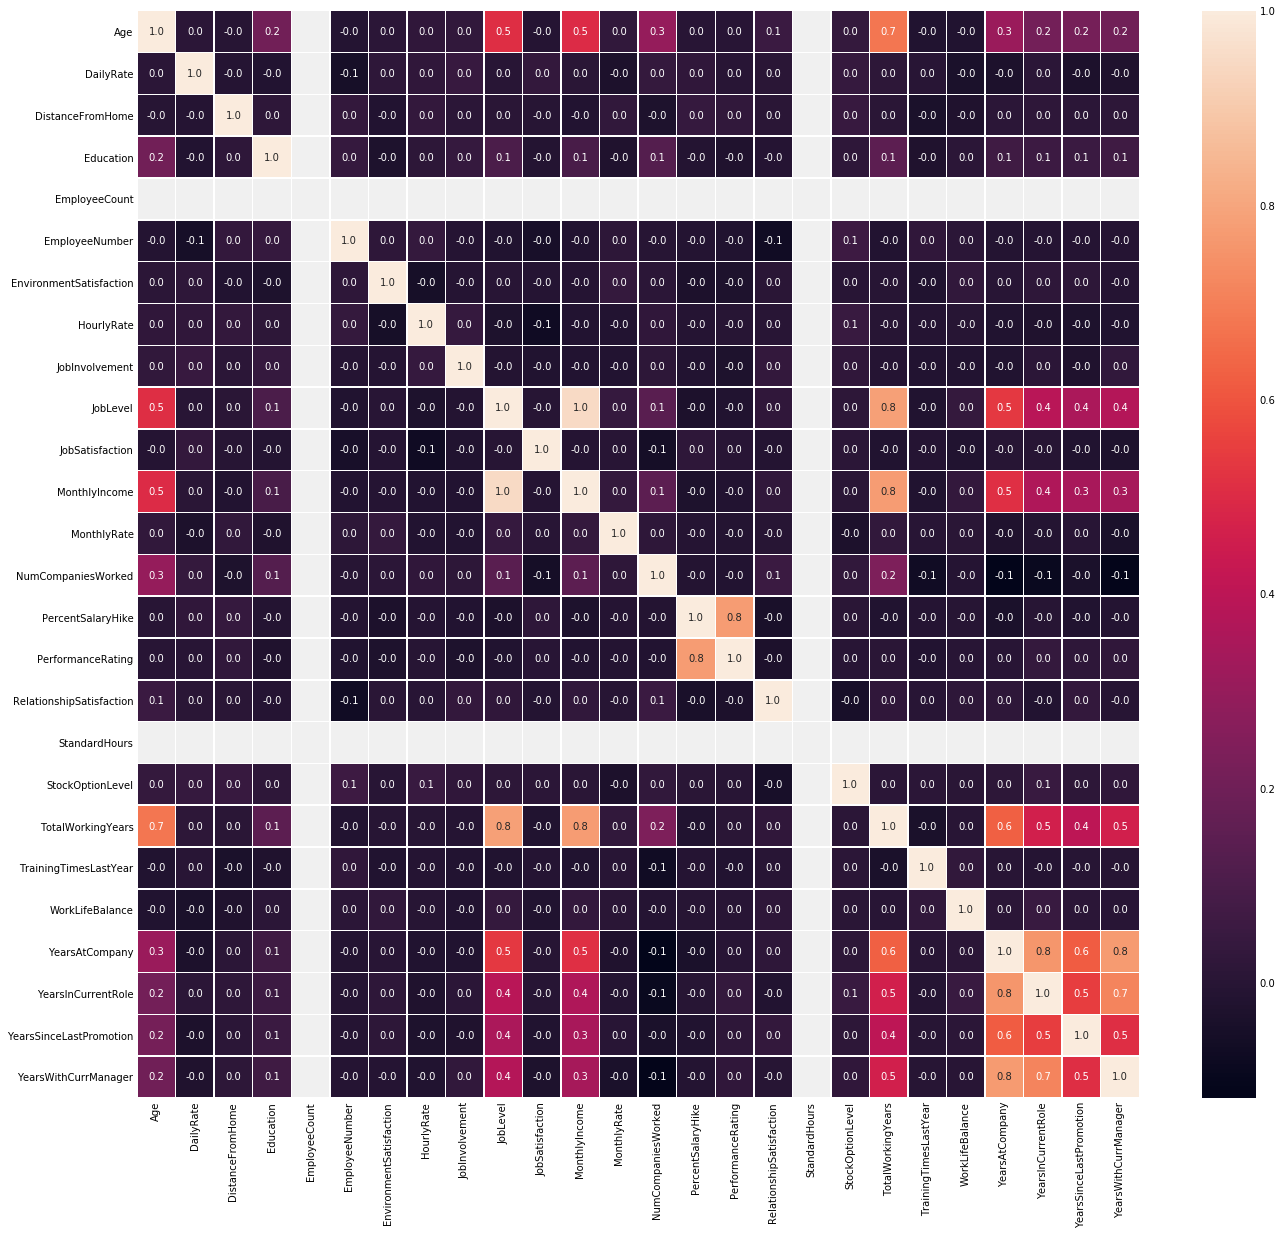

In [8]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

###### We'd now eplore the number of people based on different criteria to see which criteria is the dominat one for attrition

Text(0.5, 1.0, 'OverTime')

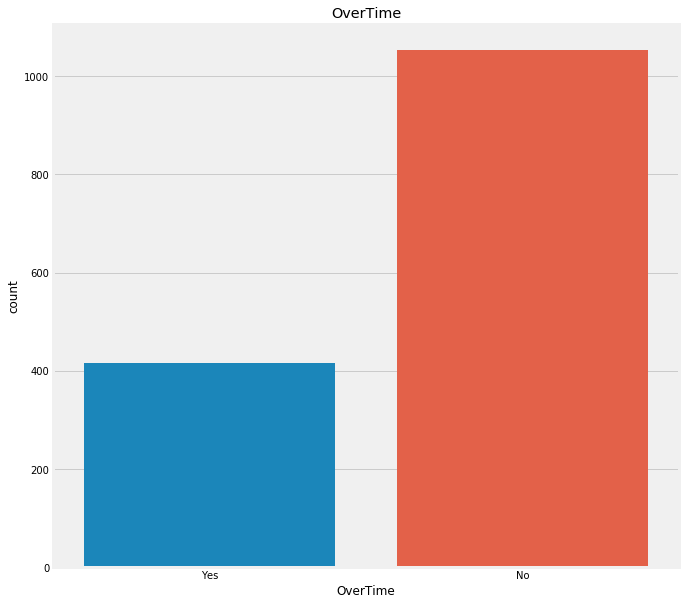

In [9]:
# count of people doing overtime
sns.countplot(data['OverTime'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('OverTime')

the Count of people doing overtime < the count of people not doing overtime

Text(0.5, 1.0, 'Marital Status')

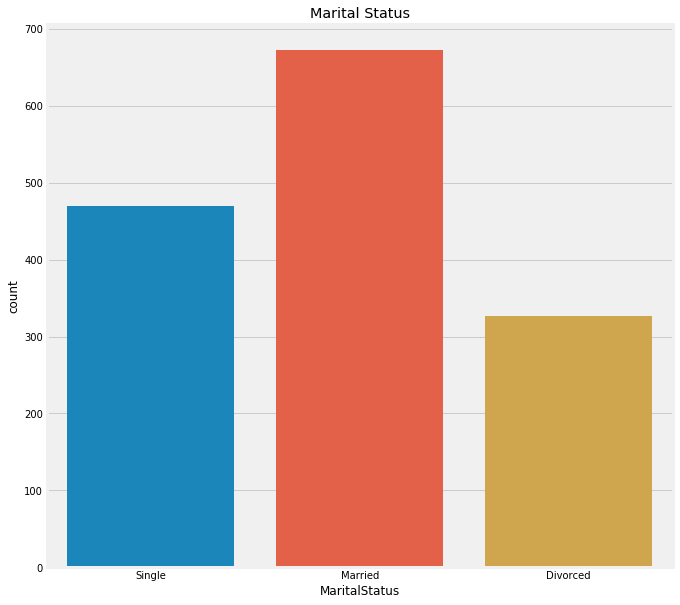

In [10]:
#count of people based on their marital status
sns.countplot(data['MaritalStatus'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Marital Status')

Text(0.5, 1.0, 'Job Role')

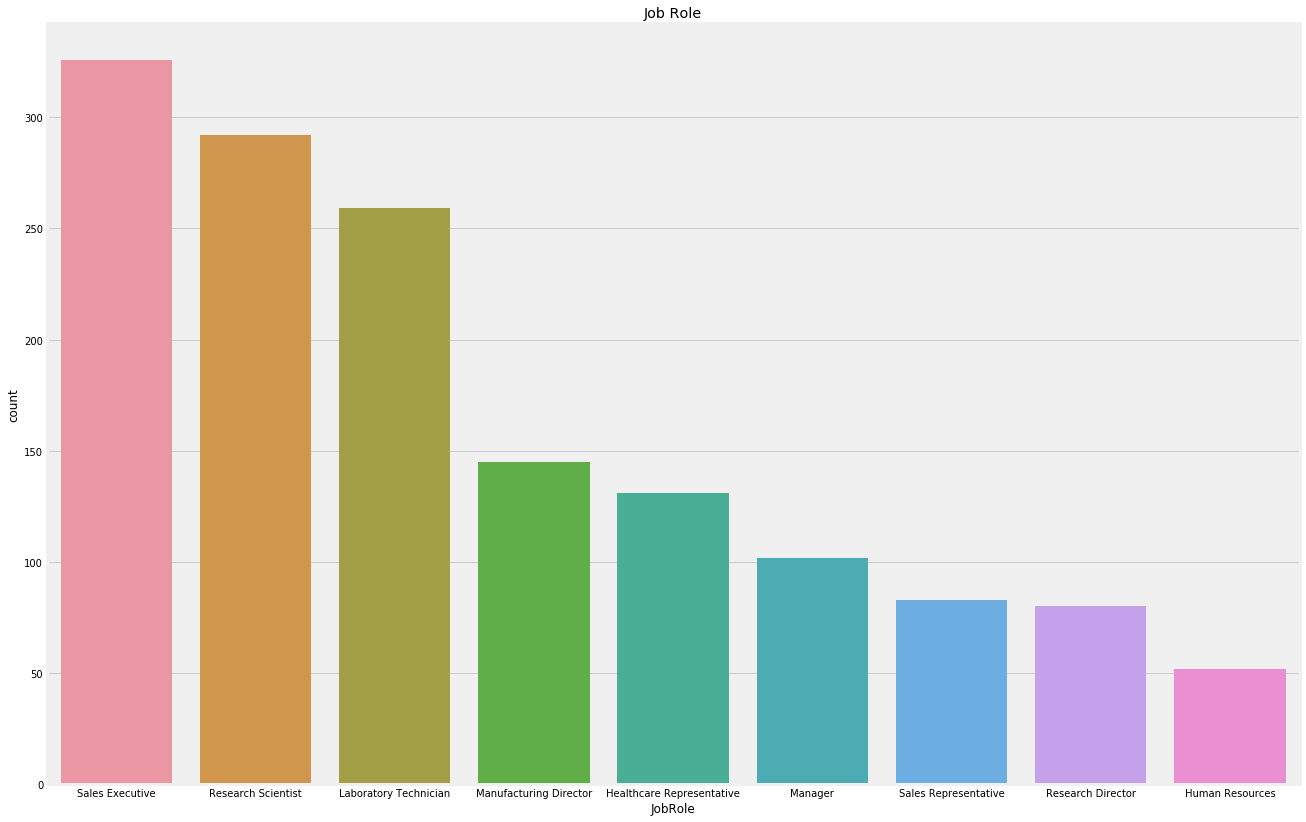

In [11]:
#count of people based on their Jobrole
sns.countplot(data['JobRole'])
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.title('Job Role')

Text(0.5, 1.0, 'Gender')

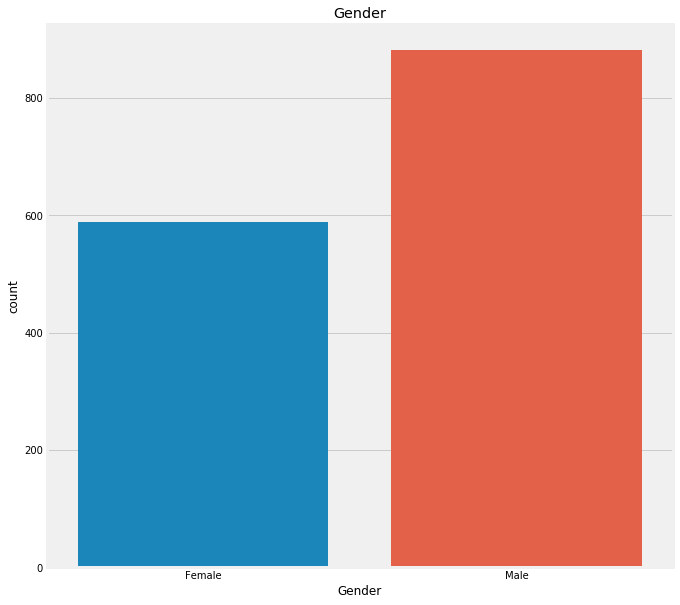

In [12]:
#count of people based on their Gender
sns.countplot(data['Gender'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Gender')

Text(0.5, 1.0, 'Education Field')

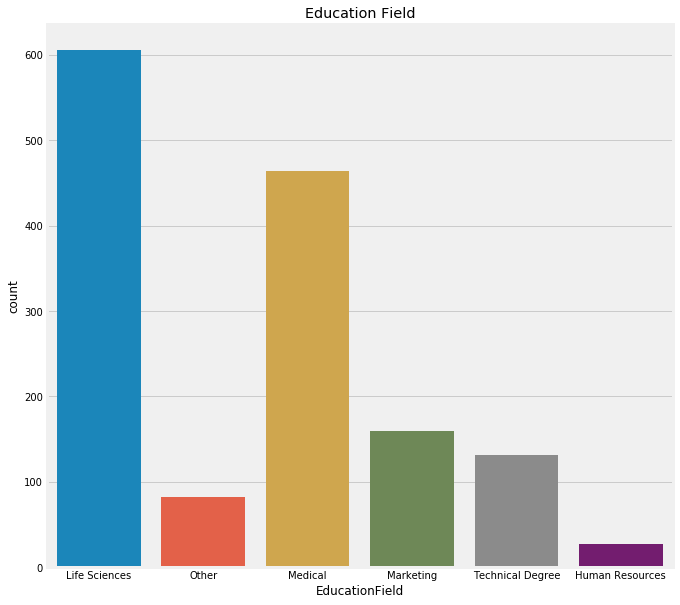

In [13]:
#count of people based on their field of education
sns.countplot(data['EducationField'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Education Field')

Text(0.5, 1.0, 'Department')

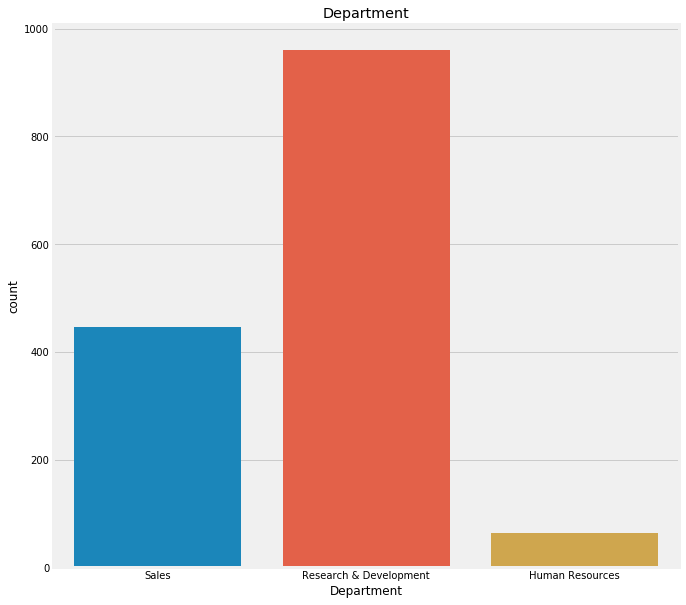

In [14]:
#count of people based on the department in which they work
sns.countplot(data['Department'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Department')

Text(0.5, 1.0, 'Business travel')

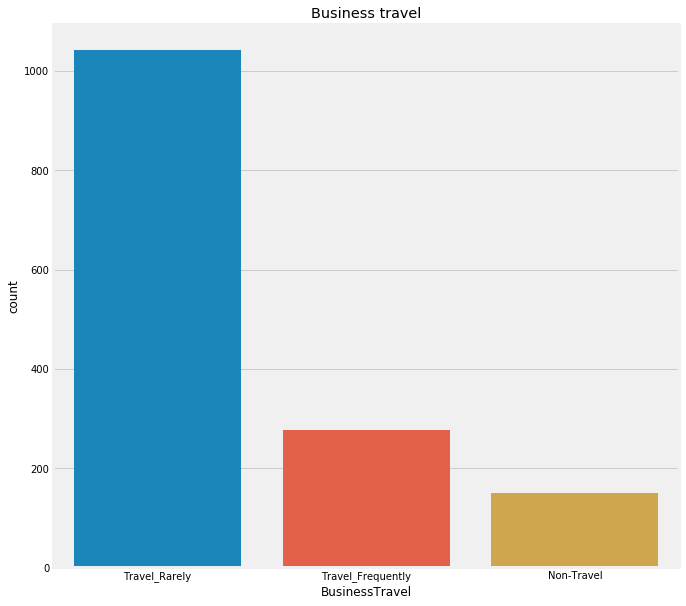

In [15]:
#count of people based on their Travel Frequency
sns.countplot(data['BusinessTravel'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Business travel')

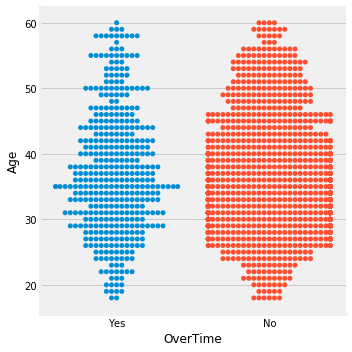

In [16]:
# analyzing the age group of the peole doing overtime
sns.catplot(x="OverTime", y="Age", kind="swarm", data=data);

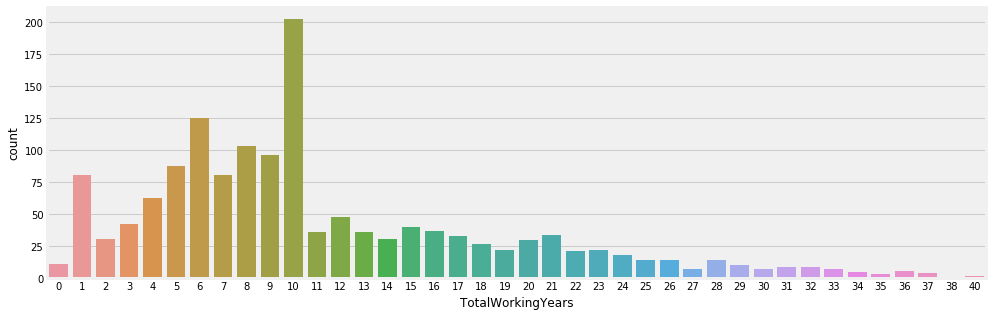

In [17]:
#count of people based on their total working years
plt.subplots(figsize=(15,5))
sns.countplot(data.TotalWorkingYears)

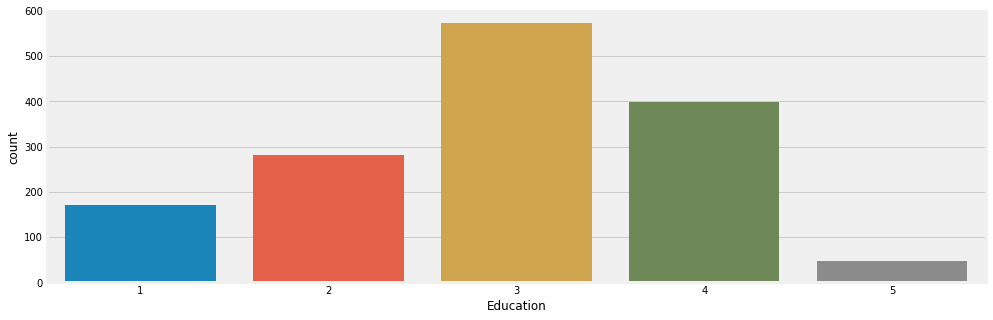

In [18]:
#count of people based on their Education
plt.subplots(figsize=(15,5))
sns.countplot(data.Education)

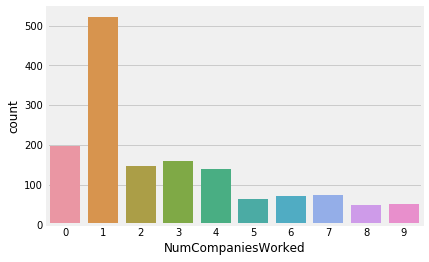

In [19]:
#count of people based on the number of companies they have worked for
sns.countplot(data.NumCompaniesWorked)

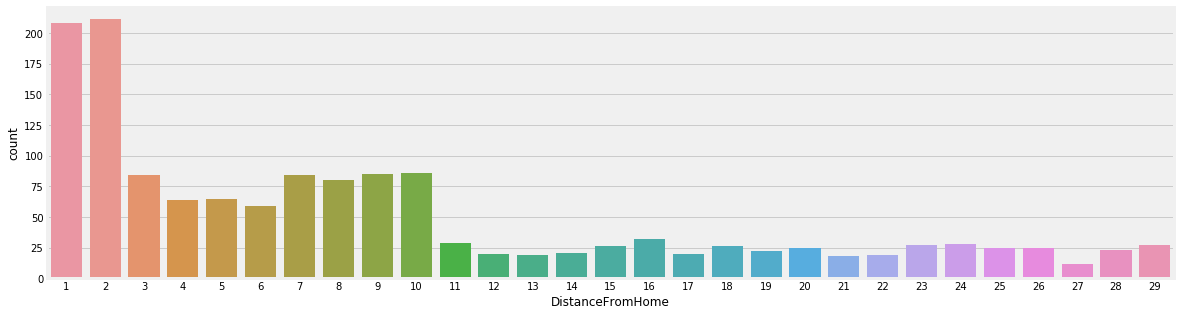

In [20]:
#count of people based on the distance from home they are working
plt.subplots(figsize=(18,5))
sns.countplot(data.DistanceFromHome)

In [21]:
# necessary imports
import time
import math
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

In [2]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
ibm_df = data # copying data to ibm_df
ibm_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [23]:
description = pd.DataFrame(index=['observations(rows)', 'percent missing', 'dtype', 'range']) # creating a dataframe with custom indices

In [24]:
# initializing empty lists
numerical = []
categorical = []


for col in ibm_df.columns:
    obs = ibm_df[col].size
    p_nan = round(ibm_df[col].isna().sum()/obs, 2) # caluclating the number of missing values
    num_nan = f'{p_nan}% ({ibm_df[col].isna().sum()}/{obs})' # caluclating the number of missing values
    dtype = 'categorical' if ibm_df[col].dtype == object else 'numerical' # defining the criteria for numerical and categorical columns
    numerical.append(col) if dtype == 'numerical' else categorical.append(col) # preparing the list of categorcal and numerical columns
    rng = f'{len(ibm_df[col].unique())} labels' if dtype == 'categorical' else f'{ibm_df[col].min()}-{ibm_df[col].max()}' # the range of values in the columns
    description[col] = [obs, num_nan, dtype, rng]

In [25]:
numerical.remove('EmployeeCount') # removing EmployeeCount from numerical columns
numerical.remove('StandardHours') # removing StandardHours from numerical columns
pd.set_option('display.max_columns', 100) # displaying 100 columns atmost
display(description)
display(ibm_df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
observations(rows),1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
percent missing,0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470)
dtype,numerical,categorical,categorical,numerical,categorical,numerical,numerical,categorical,numerical,numerical,numerical,categorical,numerical,numerical,numerical,categorical,numerical,categorical,numerical,numerical,numerical,categorical,categorical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical
range,18-60,2 labels,3 labels,102-1499,3 labels,1-29,1-5,6 labels,1-1,1-2068,1-4,2 labels,30-100,1-4,1-5,9 labels,1-4,3 labels,1009-19999,2094-26999,0-9,1 labels,2 labels,11-25,3-4,1-4,80-80,0-3,0-40,0-6,1-4,0-40,0-18,0-15,0-17


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [26]:
# defining a method for calculating accuracy,search time, hyperparameters etc for different models
def org_results(trials, hyperparams, model_name):
    fit_idx = -1
    for idx, fit  in enumerate(trials):
        hyp = fit['misc']['vals']
        xgb_hyp = {key:[val] for key, val in hyperparams.items()}
        if hyp == xgb_hyp:
            fit_idx = idx
            break
            
    train_time = str(trials[-1]['refresh_time'] - trials[0]['book_time'])
    acc = round(trials[fit_idx]['result']['accuracy'], 3)
    train_auc = round(trials[fit_idx]['result']['train auc'], 3)
    test_auc = round(trials[fit_idx]['result']['test auc'], 3)

    results = {
        'model': model_name,
        'parameter search time': train_time,
        'accuracy': acc,
        'test auc score': test_auc,
        'training auc score': train_auc,
        'parameters': hyperparams
    }
    return results

In [27]:
lgb_data = ibm_df.copy()
lgb_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [28]:
lgb_dummy = pd.get_dummies(lgb_data[categorical], drop_first=True) # creating dummy values for categoriccal columns
lgb_dummy.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [29]:
lgb_data = pd.concat([lgb_dummy, lgb_data], axis=1) # concatenating dummy columns to the original dataframe
lgb_data.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [30]:
lgb_data.drop(columns = categorical, inplace=True) # dropping the old categorical columns
lgb_data.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [31]:
lgb_data.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True) # renaming the column
lgb_data.head()

,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [32]:
y_df = lgb_data['Attrition'].reset_index(drop=True) #  creating the label column
display(y_df.head())


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: uint8

In [33]:
x_df = lgb_data.drop(columns='Attrition') # selecting the feature columns
x_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [34]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_df, y_df, test_size=0.20) # splitting the training and test data

In [35]:
print('Sample Training Data')
display(train_x.head())
print('Sample Test Data')
display(test_x.head())

Sample Training Data


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
978,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,1202,2,1,1,1375,2,89,4,2,3,6377,13888,5,20,4,2,80,3,15,0,3,12,11,11,8
1425,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,33,501,15,2,1,2009,2,95,3,2,4,4878,21653,0,13,3,1,80,1,10,6,3,9,7,8,1
955,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,55,282,2,2,1,1336,4,58,1,5,3,19187,6992,4,14,3,4,80,1,23,5,3,19,9,9,11
1172,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,29,469,10,3,1,1650,3,42,2,2,3,5869,23413,9,11,3,3,80,0,8,2,3,5,2,1,4
391,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,40,555,2,3,1,521,2,78,2,2,3,3448,13436,6,22,4,2,80,1,20,3,3,1,0,0,0


Sample Test Data


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
259,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,31,307,29,2,1,355,3,71,2,1,2,3479,11652,0,11,3,2,80,0,6,2,4,5,4,1,4
480,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,30,448,12,4,1,648,2,74,2,1,1,2033,14470,1,18,3,3,80,1,1,2,4,1,0,0,0
1097,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,24,350,21,2,1,1551,3,57,2,1,1,2296,10036,0,14,3,2,80,3,2,3,3,1,1,0,0
325,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,31,798,7,2,1,442,3,48,2,3,3,8943,14034,1,24,4,1,80,1,10,2,3,10,9,8,9
1128,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,36,1302,6,4,1,1594,1,80,4,2,1,5562,19711,3,13,3,4,80,1,9,3,3,3,2,0,2


In [36]:
print('Sample Training Labels')
display(train_y.head())
print('Sample Test Labels')
display(test_y.head())

Sample Training Labels


978     0
1425    0
955     0
1172    0
391     0
Name: Attrition, dtype: uint8

Sample Test Labels


259     1
480     1
1097    0
325     0
1128    0
Name: Attrition, dtype: uint8

In [37]:
# method to return the loss and the different accuracies for LGB model
def lgb_objective(space, early_stopping_rounds=50):
    
    lgbm = LGBMClassifier(
        learning_rate = space['learning_rate'],
        n_estimators= int(space['n_estimators']), 
        max_depth = int(space['max_depth']),
        num_leaves = int(space['num_leaves']),
        colsample_bytree = space['colsample_bytree'],
        feature_fraction = space['feature_fraction'],
        reg_lambda = space['reg_lambda'],
        reg_alpha = space['reg_alpha'],
        min_split_gain = space['min_split_gain']
    )
    
    lgbm.fit(train_x, train_y, 
            eval_set = [(train_x, train_y), (test_x, test_y)],
            early_stopping_rounds = early_stopping_rounds,
            eval_metric = 'auc',
            verbose = False)
    
    predictions = lgbm.predict(test_x)
    test_preds = lgbm.predict_proba(test_x)[:,1]
    train_preds = lgbm.predict_proba(train_x)[:,1]
    
    train_auc = roc_auc_score(train_y, train_preds)
    test_auc = roc_auc_score(test_y, test_preds)
    accuracy = accuracy_score(test_y, predictions)  

    return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
            'test auc': test_auc, 'train auc': train_auc
           }


In [38]:

trials = Trials()
# defining parameters for LGB 
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.3)),
    'n_estimators': hp.quniform('n_estimators', 50, 1200, 25),
    'max_depth': hp.quniform('max_depth', 1, 15, 1),
    'num_leaves': hp.quniform('num_leaves', 10, 150, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), 
    'feature_fraction': hp.uniform('feature_fraction', .3, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'min_split_gain': hp.uniform('min_split_gain', 0.0001, 0.1)
}

#  defining the hyper parameters
lgb_hyperparams = fmin(fn = lgb_objective, 
                 max_evals = 150, 
                 trials = trials,
                 algo = tpe.suggest,
                 space = space
                 )

lgb_results = org_results(trials.trials, lgb_hyperparams, 'LightGBM') # calling the org_results function previously defined
display(lgb_results)

100%|██████████████████████████████████████████████| 150/150 [01:43<00:00,  1.45trial/s, best loss: 0.1755479969765683]


{'model': 'LightGBM',
 'parameter search time': '0:01:43.327000',
 'accuracy': 0.901,
 'test auc score': 0.824,
 'training auc score': 0.879,
 'parameters': {'colsample_bytree': 0.6111978725808538,
  'feature_fraction': 0.5262023804175973,
  'learning_rate': 0.12333446279222843,
  'max_depth': 1.0,
  'min_split_gain': 0.05593567581774704,
  'n_estimators': 975.0,
  'num_leaves': 132.0,
  'reg_alpha': 0.5548206580774304,
  'reg_lambda': 0.6637762051999283}}

In [39]:
# creating a dataframe that shows values based on grouping by age
age=pd.DataFrame(data.groupby("Age")[["MonthlyIncome","Education","JobLevel","JobInvolvement","PerformanceRating","JobSatisfaction","EnvironmentSatisfaction","RelationshipSatisfaction","WorkLifeBalance","DailyRate","MonthlyRate"]].mean())
age.head()

,MonthlyIncome,Education,JobLevel,JobInvolvement,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DailyRate,MonthlyRate
Age,,,,,,,,,,,
18,1518.375000,2.500000,1.000,2.875000,3.000000,3.250000,2.750000,3.125000,3.000000,747.625000,14476.000000
19,2075.000000,2.111111,1.000,2.444444,3.444444,2.555556,2.444444,2.888889,3.222222,548.444444,15119.666667
20,2539.363636,2.636364,1.000,2.636364,3.000000,2.636364,3.181818,2.363636,2.909091,819.454545,16480.909091
21,2491.461538,1.615385,1.000,2.692308,3.153846,2.692308,2.692308,2.692308,2.769231,762.846154,17268.923077
22,2950.000000,1.812500,1.125,2.750000,3.250000,2.937500,2.812500,2.250000,2.750000,806.937500,14424.125000


In [40]:
age["Count"]=data.Age.value_counts(dropna=False) # adding new column to age
age.reset_index(level=0, inplace=True)
age.head()

,Age,MonthlyIncome,Education,JobLevel,JobInvolvement,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DailyRate,MonthlyRate,Count
0,18,1518.375000,2.500000,1.000,2.875000,3.000000,3.250000,2.750000,3.125000,3.000000,747.625000,14476.000000,8
1,19,2075.000000,2.111111,1.000,2.444444,3.444444,2.555556,2.444444,2.888889,3.222222,548.444444,15119.666667,9
2,20,2539.363636,2.636364,1.000,2.636364,3.000000,2.636364,3.181818,2.363636,2.909091,819.454545,16480.909091,11
3,21,2491.461538,1.615385,1.000,2.692308,3.153846,2.692308,2.692308,2.692308,2.769231,762.846154,17268.923077,13
4,22,2950.000000,1.812500,1.125,2.750000,3.250000,2.937500,2.812500,2.250000,2.750000,806.937500,14424.125000,16


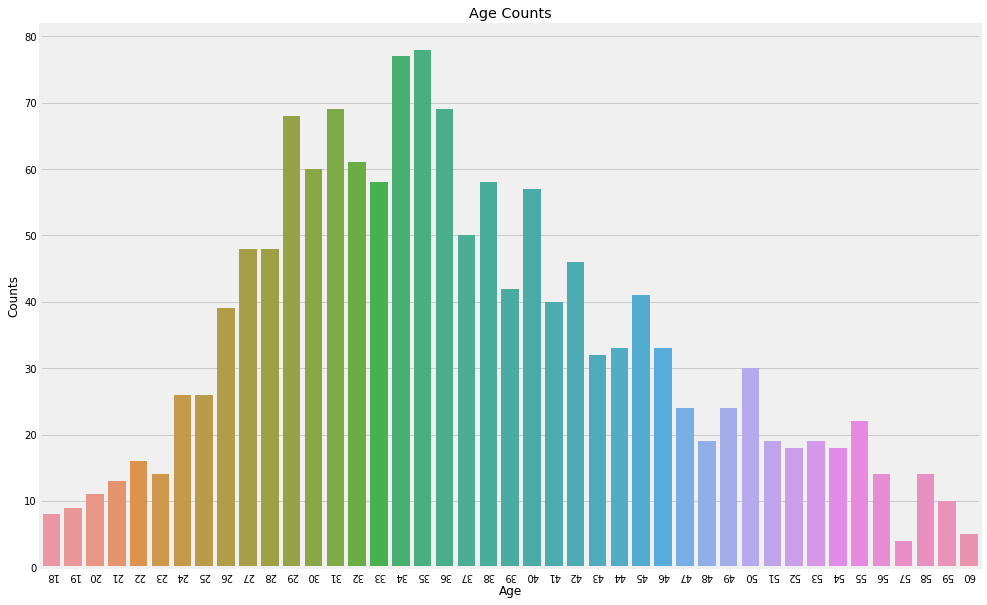

In [41]:
# showing the counts for different ages
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.Count)
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

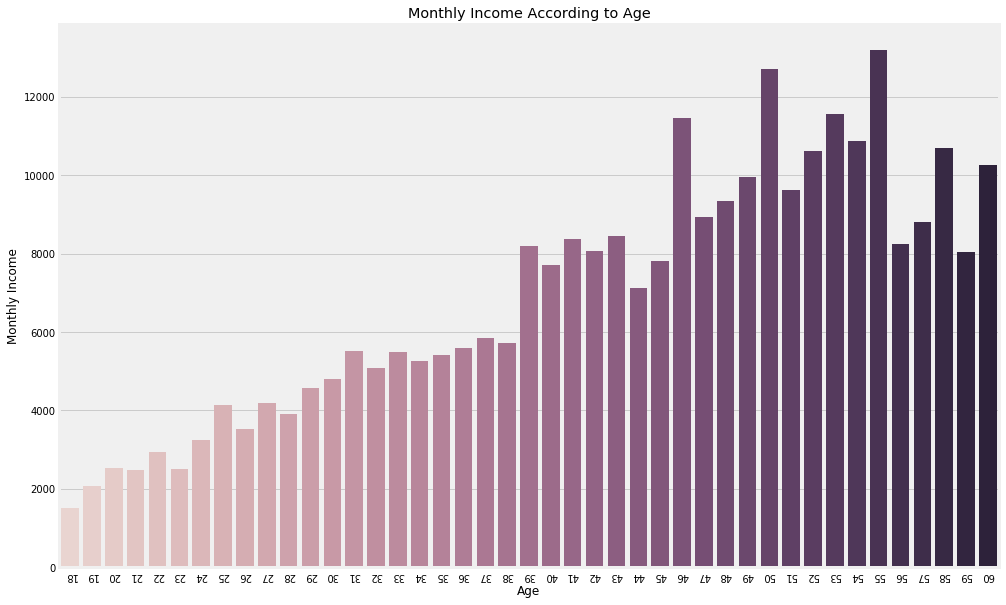

In [42]:
# showing monthly income according to age
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.MonthlyIncome,palette = sns.cubehelix_palette(len(age.index)))
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")
plt.show()

In [43]:
# creating a dataframe called income based on the jobroles
income=pd.DataFrame(data.groupby("JobRole").MonthlyIncome.mean().sort_values(ascending=False))

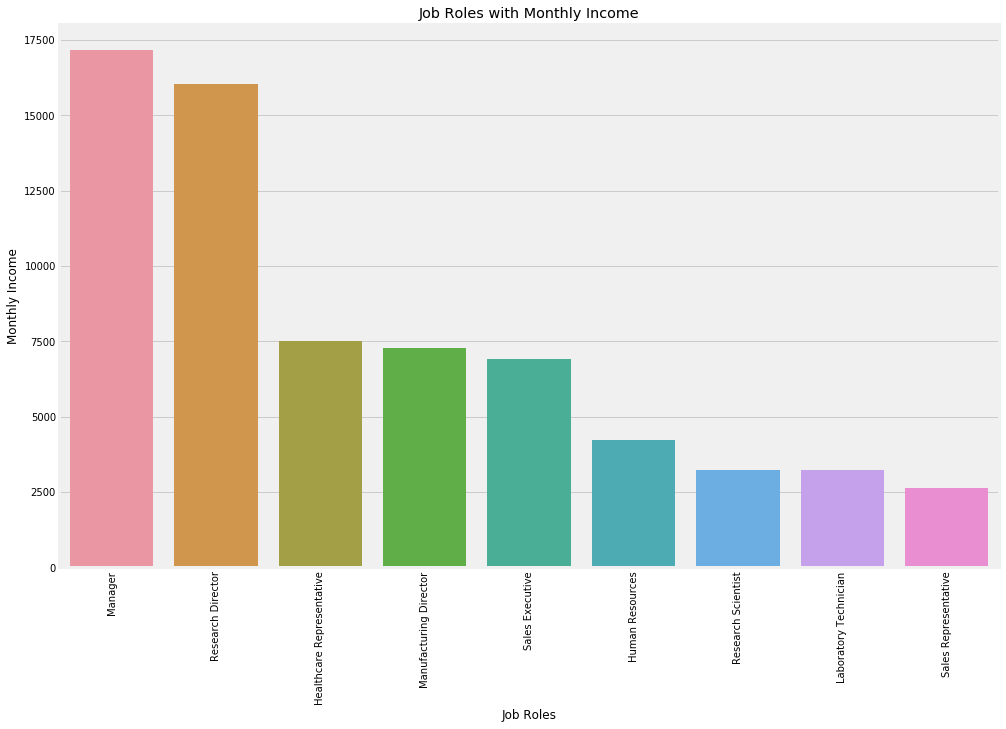

In [44]:
# showing the job roles with their monthly incomes
plt.figure(figsize=(15,10))
ax=sns.barplot(x=income.index,y=income.MonthlyIncome)
plt.xticks(rotation=90)
plt.xlabel("Job Roles")
plt.ylabel("Monthly Income")
plt.title("Job Roles with Monthly Income")
plt.show()

In [45]:
# a dataframe with mean of the selected columns grouped by job role
jobrole=pd.DataFrame(data.groupby("JobRole")["PercentSalaryHike","YearsAtCompany","TotalWorkingYears","YearsInCurrentRole","WorkLifeBalance"].mean())
jobrole

,PercentSalaryHike,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole,WorkLifeBalance
JobRole,,,,,
Healthcare Representative,15.450382,8.374046,14.068702,4.862595,2.702290
Human Resources,14.807692,5.326923,8.173077,3.134615,2.923077
Laboratory Technician,15.046332,5.019305,7.656371,3.200772,2.718147
Manager,15.137255,14.431373,24.549020,6.450980,2.774510
Manufacturing Director,15.593103,7.600000,12.786207,4.972414,2.765517
Research Director,14.950000,10.937500,21.400000,6.287500,2.862500
Research Scientist,15.448630,5.113014,7.715753,3.273973,2.678082
Sales Executive,14.889571,7.496933,11.101227,4.855828,2.803681
Sales Representative,15.674699,2.915663,4.674699,2.012048,2.891566


#### creating a pie chart based on the educational field.



In [46]:
labels=data.EducationField.value_counts().index
labels

Index(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other',
       'Human Resources'],
      dtype='object')

In [47]:
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]

In [48]:
sizes=data.EducationField.value_counts().values
sizes

array([606, 464, 159, 132,  82,  27], dtype=int64)

Text(0.5, 1.0, 'Education Field Counts')

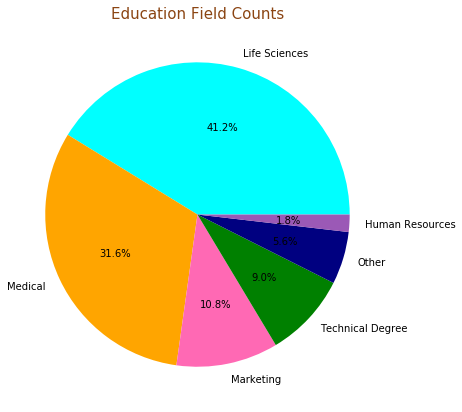

In [49]:
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Education Field Counts",color="saddlebrown",fontsize=15)

All the exploratory data analysis above shall help the HR team to find a pattern or find and filter the criteria which are most reponsible for attrition.